<a href="https://colab.research.google.com/github/Kimgabe/AIFFEL_Online_Quest/blob/main/MainQuest2(ML_Final)/%5BSub_Quest%5D_%E2%9B%B4%EF%B8%8F_Titanic_EDA_%ED%95%84%EC%82%AC_%26_%EC%B6%94%EA%B0%80%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Intro.

- ML 메인 퀘스트의 Sub-quest로 타이타닉 데이터의 간단한 EDA를 필사하고, 개인적인 코드를 추가하는 퀘스트를 진행합니다.
- 아래의 사항이 필수적으로 들어가야 합니다.
    - Q1. 컬럼정의 - 각 컬럼과 그 자료형에 대한 설명
    - Q2. 결측치와 이상치 제거 - 필요하지 않은 데이터, 결측치, 이상치를 찾고 제거
    - Q3. 개별 특성 파악 - 다양한 방식의 그래프로, 개별 특성 파악하고 시각화 하기
    - Q4. 특성간 상관관계분석 - 다양한 방식 그래프로 연관 특성 찾기
    
- 시각화 자료 & 마크다운으로 작업 방향의 근거와 데이터 해석 의견을 함께 기술해야 합니다.    

---

- 해당 데이터는 타이타닉호에 승선했던 승객들의 생존/사망 여부를 예측하는 classification 모델을 구축해야 하는 데이터 입니다.
- 이번 노트에선 실제 분석까지 진행하진 않겠지만, 이를 염두해 두고 데이터들을 EDA하고 전처리 하도록 하겠습니다.

[데이터 출처 : Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data)

# 데이터셋 정보

- 케글에서는 training set 과 test set 데이터를 별개로 제공하고 있습니다.
- 분석 데이터의 컬럼은 총 10개로 되어 있으며 상세 정보는 아래와 같습니다.
    - survival: 생존 여부를 나타냅니다. 0은 사망을, 1은 생존을 의미합니다.
    - pclass(승객등급):
        - 기본적으론 티켓 등급을 나타내며, 1은 1등석, 2는 2등석, 3은 3등석을 의미합니다.
        - 하지만 승객의 사회적 지위를 대변하는 데이터이기도 합니다.
    - sex: 승객의 성별입니다.
    - Age: 승객의 나이입니다. 연령은 연 단위로 표시됩니다.
        - 만 1세 미만일 경우 분수로 표기 됩니다.
        - 나이가 주정된 경우, xx.5 형태로 표시됩니다.
    - sibsp: 타이타닉 호에 탑승한 형제, 자매, 배우자의 수를 나타냅니다.
        - 정부나 약혼자는 포함되지 않습니다.
    - parch: 타이타닉 호에 탑승한 부모, 자녀의 수를 나타냅니다.
        - 어떤 아이들은 보모와 함께 여행한 경우가 있는데 이 경우 parch는 0이 됩니다.
        - 보모가 있을정도면 사회적 지위가 높을 가능성이 있으므로 이를 염두해 두어야 할 것입니다.
    - ticket: 티켓 번호입니다.
    - fare: 승객이 지불한 요금입니다.
    - cabin: 객실 번호입니다.
    - embarked: 승선한 항구를 나타냅니다.
        - C는 셰르부르(Cherbourg), Q는 퀸스타운(Queenstown), S는 사우샘프턴(Southampton)을 의미합니다.
        
---

In [ ]:
# 기본 필요 라이브러리 불러오기

import numpy as np
import pandas as pd
from tqdm import tqdm

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

## 데이터 불러오기

In [ ]:
original = pd.read_csv('../data/titanic_train.csv')
original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

- 가장 기본적인 데이터 탐색부터 진행해보겠습니다.
- 기초통계량이나 결측치 등에 대한 데이터를 탐색해보겠습니다.

## 기초통계량 분석

In [ ]:
df = original.copy() # EDA용 데이터 복사

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 전체 데이터는 891개의 row로 구성되어 있습니다.
- Age, Cabin 등에서 결측치가 관측되고 있습니다.
- 처음 데이터셋 정보에서 살펴본 바로는 Cabin은 객실번호 이므로 아주 중요한 데이터는 아닐 것으로 추정됩니다.
    - Plcass등 다른 데이터로도 필요한 정보들은 확보할 수 있을 것 같습니다.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 앞서 `info()` 로 살펴봤던데로 Age와 Cabin에 많은 결측치가 있습니다.
- 미처 확인못했던 결측치가 Embarked에도 있습니다.
- 하지만 미미한 수준이고, 해당 데이터가 타겟변수나 기타 변수와의 유의미한 상관관계가 없다면 무시해도 될 수준이라 생각됩니다.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 수치형 데이터에 대한 기본적인 분석 부터 시작해보겠습니다.

---

- PassengerId (승객 ID)
    - 총 891명의 승객이 데이터에 포함되어 있습니다.
    - 승객 ID는 1부터 891까지의 값을 가집니다.

- Survived (생존 여부)
    - 평균적으로 약 38.38%의 승객이 생존했습니다 (평균 0.383838)
    - 생존 여부는 0(사망) 또는 1(생존)의 값을 가집니다.

- Pclass (티켓 등급)
    - 승객들의 평균 티켓 등급은 약 2.31입니다.
    - 티켓 등급은 1, 2, 3의 세 가지 값을 가지며, 이는 각각 1등석, 2등석, 3등석을 의미합니다.
    - **평균 티켓 등급으로 보아 대부분의 승객이 2~3등급이었을 것으로 추축됩니다.**
    - **차후 histogram을 그려 분포를 확인해보겠습니다.**
    
- Age (나이)
    - 승객의 평균 나이는 약 29.7세입니다.
    - 나이 데이터는 714명의 승객에 대해서만 기록되어 있습니다. 즉, 일부 승객의 나이 정보가 누락되어 있습니다.
    - 나이는 최소 0.42세(약 5개월)에서 최대 80세까지 다양합니다.
    - 나이의 경우 결측치가 상당수 존재하지만 'Name'컬럼을 보면 이름에 다양한 호칭이 붙어 있습니다.
        - 이 **호칭을 통해 어느정도의 나이를 유추**할 수는 있을 것 같습니다. (Mr, Miss, Ms 등)
        - Age가 타켓변수나 타 변수와 유의미한 상관관계가 있는 것이 밝혀진다면 이를 분석해보도록 하겠습니다.
    
- SibSp (형제자매/배우자 수)
    - 평균적으로 승객들은 약 0.52명의 형제자매나 배우자와 함께 탑승했습니다.
    - 이 값은 최소 0명에서 최대 8명까지 다양합니다
    - **통상적으로 형제자매나 배우자가 많은 사람들은 자녀가 있을 가능성이 있고, 이 경우 생존에 영향을 미쳤으리라 예상할 수 있습니다.**
    - 유의미한 상관관계가 밝혀진다면 이런 부분에 대해서도 살펴보도록 하겠습니다.
    
Parch (부모/자녀 수)
    - 평균적으로 승객들은 약 0.38명의 부모나 자녀와 함께 탑승했습니다.
    - 이 값은 최소 0명에서 최대 6명까지 다양합니다.

- Fare (요금)
    - 승객들이 지불한 평균 요금은 약 32.20달러입니다.
    - 요금은 최소 0달러에서 최대 약 512.33달러까지 다양하며, 분포가 매우 넓습니다.
    - **Pclass, Cabin과 함께 분석을 해보면 비어 있는 Cabin의 결측치를 어느정도 유추할 수 있을 것 같습니다.**
    
---

- 하지만 아직은 단순한 가설이고, 어떠한 것도 근거있는 가설은 아닙니다.
- 다만 데이터를 보고 통상적으로 생각해볼 수 있는 것들에 대한 언급이었습니다.
- 전반적인 분석을 위해서는 일단 수치형데이터가 아닌 데이터에 대한 결측치, 이상치 처리를 해보면 좋을 것 같습니다.
- 전체 데이터에 대한 상관관계를 확인해보고 싶기 때문입니다.

## 상관관계 분석

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib # 한글출력 자동실행 라이브러리

### Pairplot

- pairplot은 데이터셋의 각 변수 쌍에 대한 산점도와 단변량 분포를 함께 나타내는 시각화 도구로, 데이터 간의 관계를 빠르게 파악하는 데 유용합니다.
- 여기서는 각 point는 승객 1명을 의미하며, 주황색은 생존한 승객, 파란색은 사망한 승객을 의미합니다.

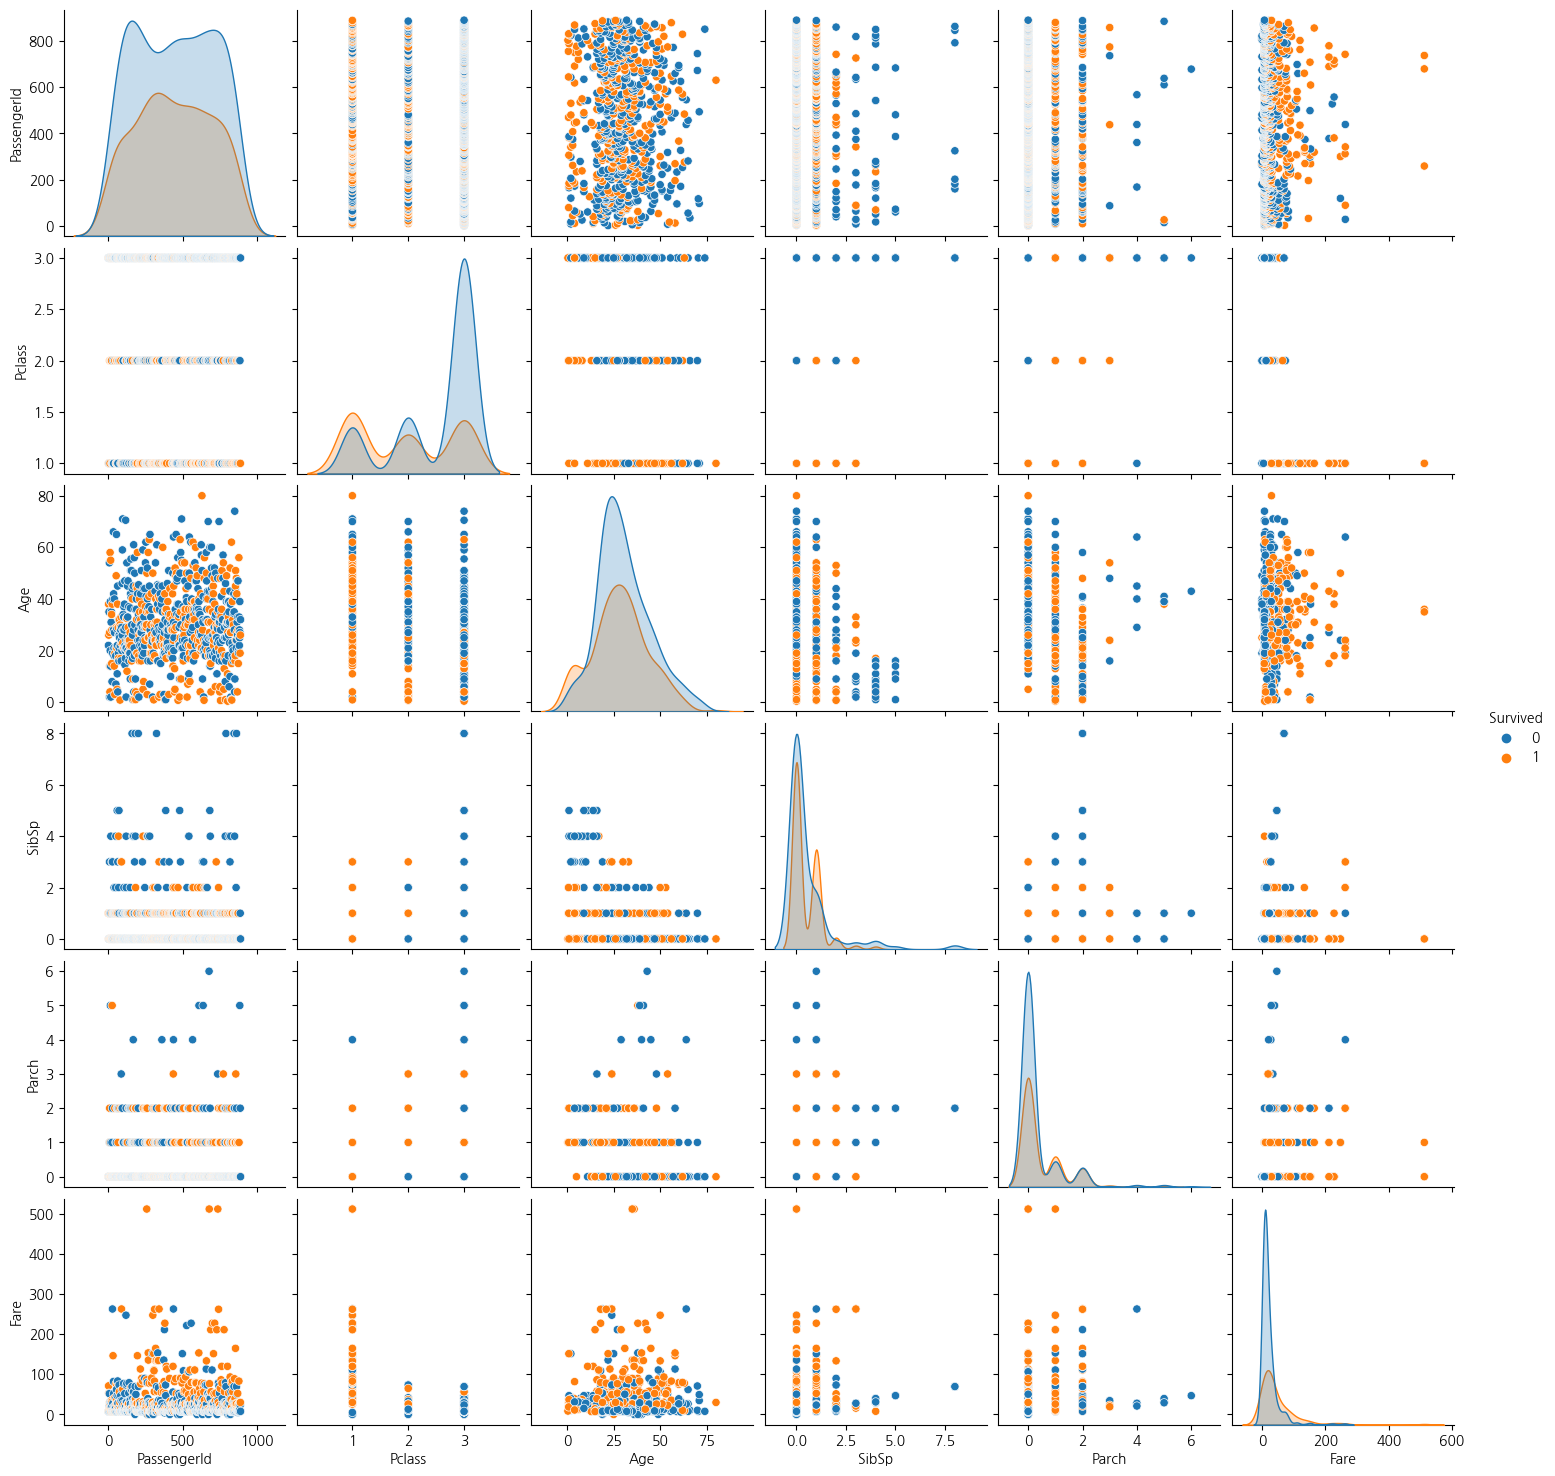

In [ ]:
# 데이터프레임에서 'Survived' 컬럼을 중심으로 Scatterplot Matrix 그리기
sns.pairplot(df, hue='Survived')

# 그래프를 출력
plt.show()

- 이 pairplot으로 판단할 수 있는 정보는 아래와 같습니다.

---

- Survived
    - 생존한 승객과 생존하지 못한 승객 사이에 분명한 차이가 보입니다.
    - 특히 Pclass, Age, Fare와 같은 변수들과의 관계에서 차이가 두드러집니다.

- Pclass
    - 더 높은 클래스(1st)의 승객이 더 많이 생존한 것처럼 보입니다.
    - 또한 Fare와 Pclass 사이에는 역의 상관관계가 있어 보이며, 이는 높은 클래스일수록 더 높은 요금을 지불했음을 시사합니다.

- Age
    - 나이가 어린 승객들, 특히 어린이들이 더 높은 생존율을 보이는 경향이 있어 보입니다.
    - 이는 Age와 Pclass의 산점도에서 확인할 수 있습니다.
    - 영화를 완전히 믿을 순 없지만 어린 아이부터 구출을 시도 했을 수도 있고, 부모나 보모에 의해 우선적으로 대피가 되었기 때문일 수도 있습니다.
        -이 부분에 대해서는 다른 변수(parch, sibsp, pclass 등)를 활용해 추가적으로 더 분석해 볼 필요가 있습니다.
        

- SibSp & Parch
    - 형제자매, 배우자, 부모, 자녀가 있는 승객들이 혼자인 승객들보다 생존율이 높은 경향이 있습니다.
    - 가족 단위로 여행한 승객들이 서로 도와 생존율이 높아졌을 가능성이 있습니다.

- Fare
    - 높은 요금을 지불한 승객들이 더 많이 생존한 것으로 보입니다.
    - 이는 더 높은 요금을 지불한 승객들이 더 높은 클래스에 탑승했고, 그로 인해 생존 기회가 더 많았을 수 있음을 나타냅니다.
    
---

- 이 pairplot 으로 판단한 정보들을 바탕으로 아래의 분석을 시도해볼 수 있을 것 같습니다.
    - 성별과 생존률 : 역사적으로 여성/어린아이 생존율이 높았다 알려지고 있으므로 이를 살펴볼 필요가 있습니다.
    - 객실 등급별 생존률 : 통상적으로 고위층일 수록 우선적으로 구출되었을 가능성이 있으므로 이를 살펴보겠습니다.
    - 나이 변수에 대한 결측치 처리 : 나이에 결측치가 많아 이에 대한 처리를 시도하고 생존률과의 관계를 살펴보겠습니다.
    - 가족 구성원 수와 생존률 : SibSp, Parch를 결헙해 총 가족 구성원을 유추할 수 있을 것 같습니다.
    - 승선 항구별 생존률 분석
    - 생존자와 비생존자의 분포 차이 분석 : 특히 Age, Fare, Pclass를 중심으로 살펴볼 필요가 있습니다.
    - 변수간 상호 작용 분석
        - 나이 & 성별
        - 객실등급 & 요금 등

## 성별에 따른 생존률 분석

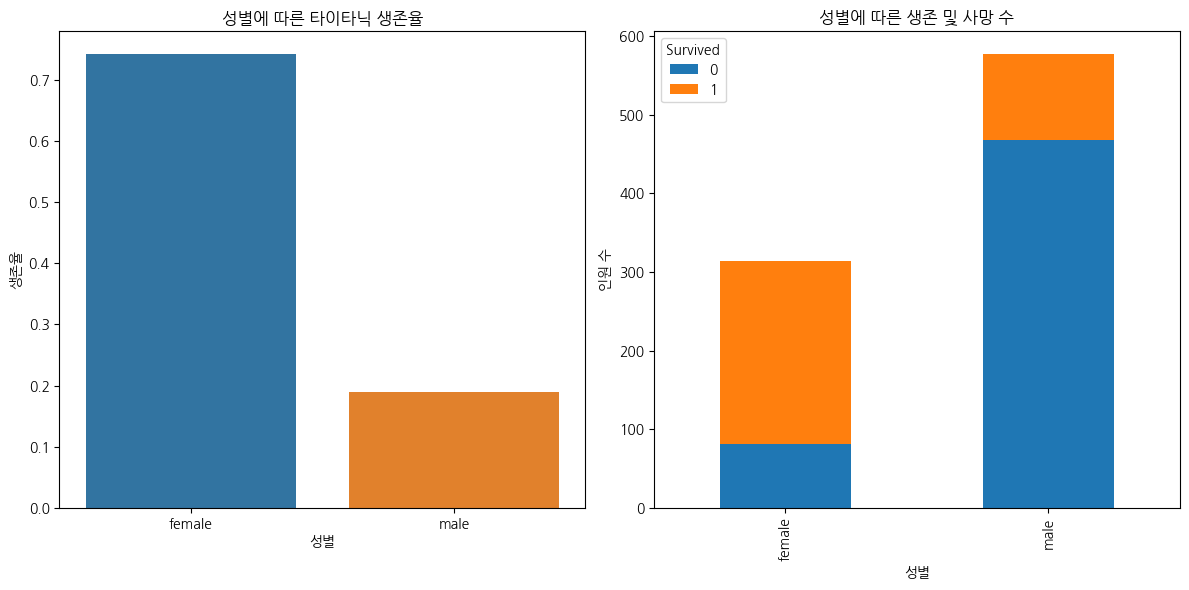

In [ ]:
# 좌측 그래프: 성별에 따른 생존율
survival_rates = df.groupby('Sex')['Survived'].mean()

# 두 개의 그래프를 하나의 캔버스에 그리기 위해 subplot 사용
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 좌측 그래프
sns.barplot(x=survival_rates.index, y=survival_rates.values, ax=axes[0])
axes[0].set_title('성별에 따른 타이타닉 생존율')
axes[0].set_ylabel('생존율')
axes[0].set_xlabel('성별')

# 우측 그래프: 성별로 생존/사망의 수 (stacked bar)
survival_count = df.groupby(['Sex', 'Survived']).size().unstack()
survival_count.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('성별에 따른 생존 및 사망 수')
axes[1].set_ylabel('인원 수')
axes[1].set_xlabel('성별')

plt.tight_layout()
plt.show()

- 통상적으로 알려진바와 같이 여성의 경우 생존율이 더 높은 것으로 분석됩니다.
- 반대로 남성의 경우 생존률이 20%정도로 매우 낮습니다.
- 차후에 Age 컬럼에 대한 결측치 처리가 되면 성인의 비율을 추가로 살펴봐야 할 것 같습니다.

## 객실등급(Pclass)에 따른 생존률 분석

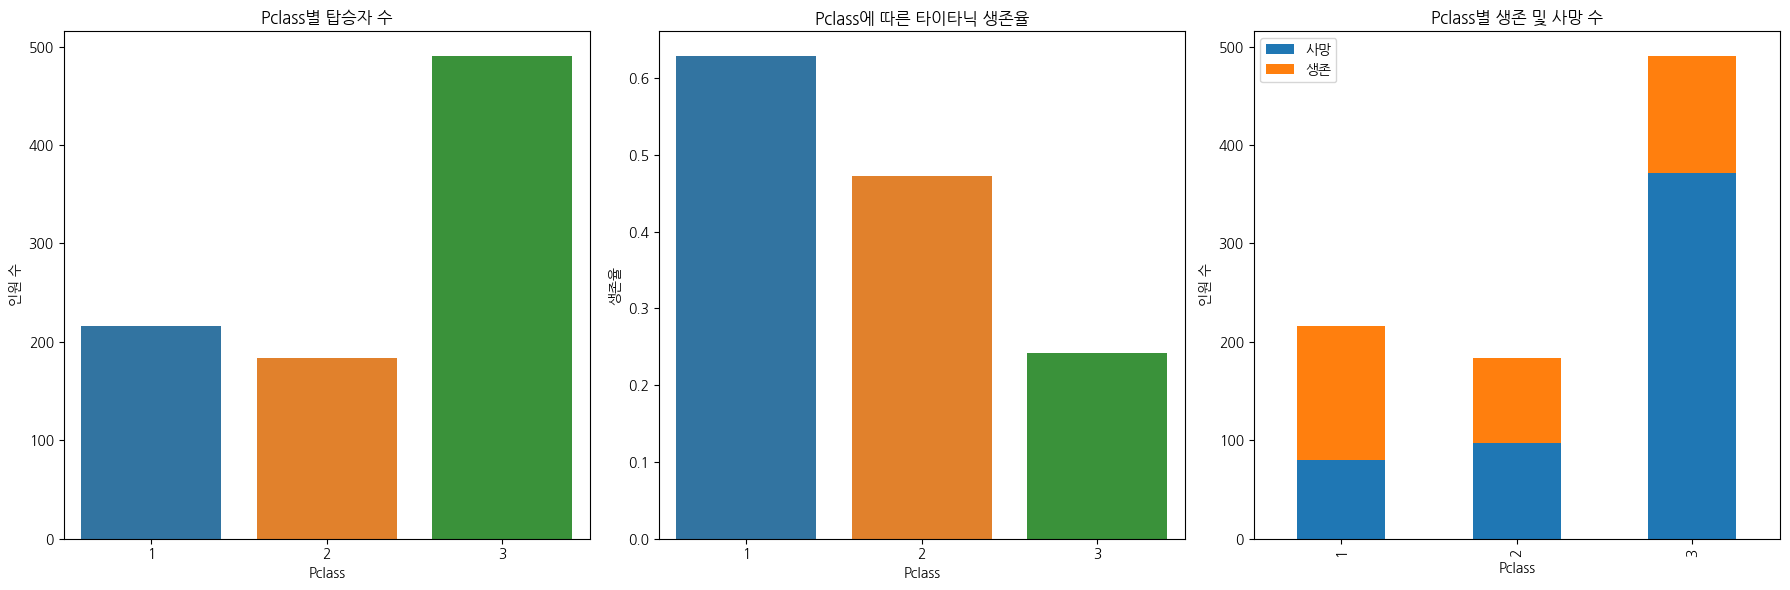

In [ ]:
# 세 개의 그래프를 하나의 캔버스에 그리기 위해 subplot 사용
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 가장 좌측 그래프: Pclass별 탑승자 수
pclass_count = df['Pclass'].value_counts().sort_index()
sns.barplot(x=pclass_count.index, y=pclass_count.values, ax=axes[0])
axes[0].set_title('Pclass별 탑승자 수')
axes[0].set_ylabel('인원 수')
axes[0].set_xlabel('Pclass')

# 중앙 그래프: Pclass에 따른 생존율
pclass_survival_rates = df.groupby('Pclass')['Survived'].mean()
sns.barplot(x=pclass_survival_rates.index, y=pclass_survival_rates.values, ax=axes[1])
axes[1].set_title('Pclass에 따른 타이타닉 생존율')
axes[1].set_ylabel('생존율')
axes[1].set_xlabel('Pclass')

# 우측 그래프: Pclass별 생존/사망의 수 (stacked bar)
pclass_survival_count = df.groupby(['Pclass', 'Survived']).size().unstack()
pclass_survival_count.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Pclass별 생존 및 사망 수')
axes[2].set_ylabel('인원 수')
axes[2].set_xlabel('Pclass')

# Legend 추가
axes[2].legend(['사망', '생존'])

plt.tight_layout()
plt.show()


- describe에서도 확인했듯이, 대부분의 승객이 3등급 승객이며, 이 3등급 승객들의 생존률이 가장 낮은 것이 확인됩니다.
- 또한 1등급 승객들의 생존률이 가장 높은 것으로 나타납니다. 이는 생존예측을 위한 중요 변수가 될 것으로 보여집니다.
- 차후에 Age컬럼 결측치를 처리한 이후, 성별과 나이를 결합해 살펴보면 더 유의미한 변수 도출이 가능할 것 같습니다.

## Name 데이터를 통한 Age 추측

- Name 컬럼에서 각 승객의 호칭을 추출합니다.
- 검색을 좀 해보니 타이타닉에 대해 Name으로 분석한 다양한 노트가 있습니다.
- 다른 노트의 분석을 보면 보통 호칭은 성(name)과 이름(first name) 사이에 위치하며, 대부분의 경우 점(.)으로 끝납니다 (예: Mr., Mrs., Miss.).
- 이를 차용해서 분석에 이용해 보겠습니다.

In [ ]:
import re  # 정규 표현식을 사용하기 위한 re 모듈을 임포트합니다.

# 호칭 추출을 위한 정규 표현식 패턴을 정의합니다.
title_pattern = r', ([A-Za-z]+)\.'
# - title_pattern은 쉼표 뒤에 공백과 대문자 또는 소문자 알파벳 문자들로 이루어진 호칭을 추출하기 위한 패턴
# - r은 "raw string"을 의미하며, 역슬래시(백슬래시) 문자를 이스케이프하지 않고 그대로 표현하는 것을 의미합니다.
# - [A-Za-z]는 대문자 A부터 Z까지와 소문자 a부터 z까지의 알파벳 문자를 의미합니다.
# - +는 해당 패턴이 한 번 이상 반복될 수 있음을 나타냅니다.
# - \.은 온점 문자 자체를 의미합니다. 온점은 정규 표현식에서 특별한 의미를 갖는 문자이므로 이스케이프 처리합니다.

# 호칭 추출 함수를 정의합니다.
def extract_title(name):
    # re.search() 함수를 사용하여 name 문자열에서 호칭 패턴을 찾습니다.
    title_match = re.search(title_pattern, name)
    if title_match:
        # 만약 호칭 패턴이 발견되면 호칭 부분을 추출하여 반환합니다.
        return title_match.group(1)
    else:
        # 호칭 패턴이 발견되지 않으면 None을 반환합니다.
        return None

# Name 컬럼에서 호칭을 추출하여 새로운 컬럼 'Title'에 저장합니다.
df['Title'] = df['Name'].apply(extract_title)

# 추출된 호칭 데이터를 확인하기 위해 'Title' 컬럼의 값들을 count합니다.
df['Title'].value_counts()
# - 이를 통해 추출된 호칭 데이터의 분포를 확인합니다.

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
# 호칭을 기준으로 데이터 그룹화
grouped_df = df.groupby('Title')

# 각 호칭 그룹별 나이 분석
age_analysis = grouped_df['Age'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
# reset_index로 groupby 한 데이터를 다시 일반적인 df형태로 변경

# 결과 출력
age_analysis

,Title,mean,median,min,max,std
0,Capt,70.000000,70.0,70.00,70.0,NaN
1,Col,58.000000,58.0,56.00,60.0,2.828427
2,Don,40.000000,40.0,40.00,40.0,NaN
3,Dr,42.000000,46.5,23.00,54.0,12.016655
4,Jonkheer,38.000000,38.0,38.00,38.0,NaN
5,Lady,48.000000,48.0,48.00,48.0,NaN
6,Major,48.500000,48.5,45.00,52.0,4.949747
7,Master,4.574167,3.5,0.42,12.0,3.619872
8,Miss,21.773973,21.0,0.75,63.0,12.990292
9,Mlle,24.000000,24.0,24.00,24.0,0.000000


- std가 nan인 데이터는 해당 호칭을 가진 승객이 거의 없거나 1명뿐이란 의미입니다.
    - 시각화를 통해 각 호칭별로 몇명의 인원이 있는지 살펴보겠습니다.
---

- Mr, Miss등 통상적인 호칭을 제외한 호칭에 대한 정보를 구글링해보니 아래와 같습니다.
    - Capt: "Captain"의 약어로, 선장을 의미
    - Don: 스페인어에서 "군주" 또는 "귀족"을 나타내는 호칭
    - Jonkheer: 네덜란드어로, 귀족 계급에서 사용되는 호칭으로 "남작"에 해당
    - Lady: 영어로 "부인"을 나타내며, 주로 귀족 계급의 여성을 지칭
    - Major: 군대에서 "소령"을 나타내는 호칭
    - Sir: 영국에서 남성 귀족에게 사용되는 공손한 호칭, 주로 기사나 귀족을 표현
    - Master : 미혼 남성 아이나 청소년에게 붙는 호칭

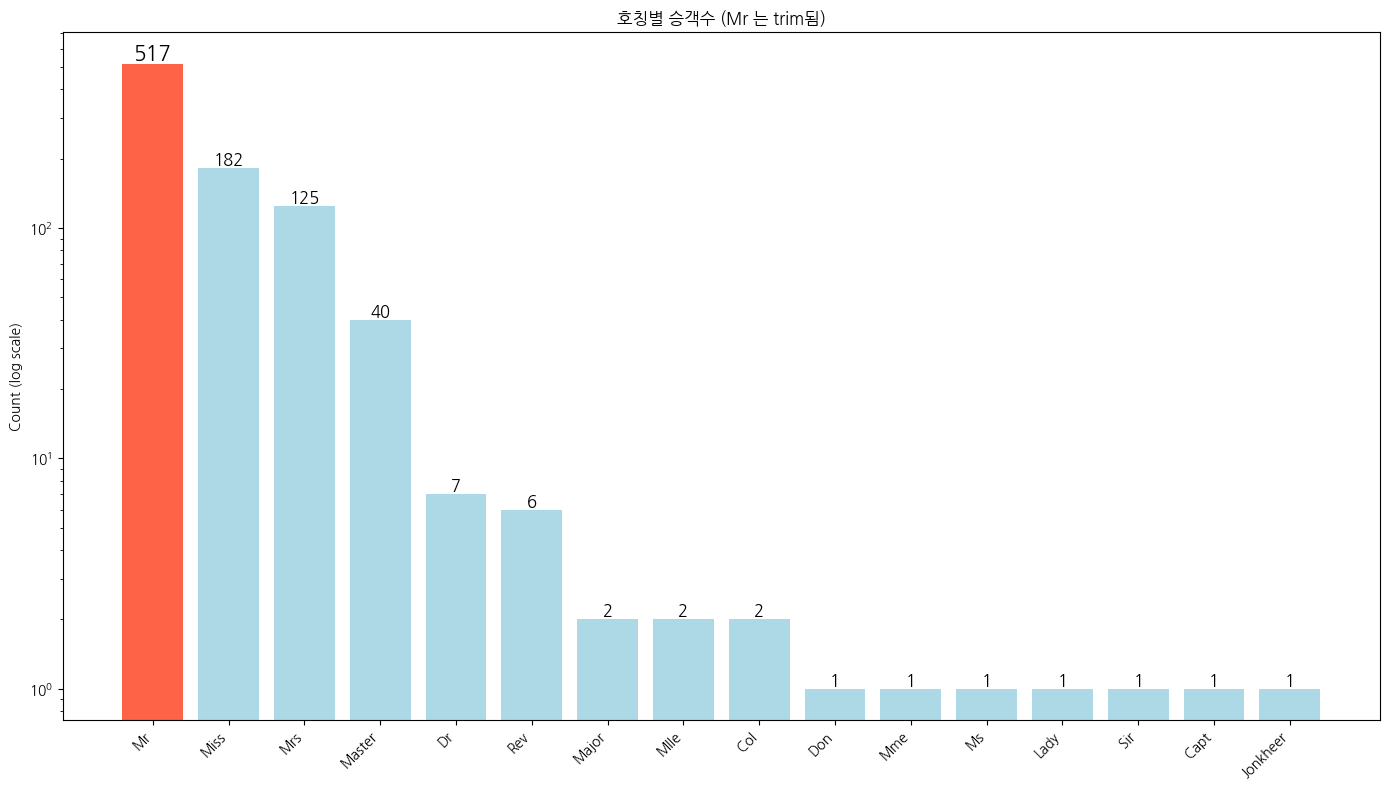

In [ ]:
# 호칭별 카운트 구하기
title_counts = df['Title'].value_counts()

# 'Mr' 제외하고 나머지 호칭들만 가져오기
title_counts_without_mr = title_counts.drop('Mr')

# 'Mr' 호칭의 카운트를 별도로 저장
mr_count = title_counts['Mr']

# 그래프 그리기
plt.figure(figsize=(14, 8))

# 'Mr' 호칭은 물결 표시를 위해 별도의 바와 텍스트로 표시
plt.bar('Mr', mr_count, color='tomato')
plt.text('Mr', mr_count, f'{mr_count}', ha='center', va='bottom', fontsize=15)  # 수치 입력

# 나머지 호칭들에 대한 바 그래프
for i, count in enumerate(title_counts_without_mr.values):
    plt.bar(title_counts_without_mr.index[i], count, color='lightblue')
    plt.text(title_counts_without_mr.index[i], count, f'{count}', ha='center', va='bottom', fontsize=12)  # 수치 입력

# y축 스케일을 'Mr' 호칭을 제외한 나머지 호칭에 맞춤
plt.yscale('log')  # 로그 스케일 사용
plt.ylabel('Count (log scale)')
plt.title('호칭별 승객수 (Mr 는 trim됨)')
plt.xticks(rotation=45, ha='right')

# 그래프를 파일로 저장
plt.tight_layout() # 그래프 크기 최적화
plt.show()

- 전체 승객 891명중 대부분이 Mr 호칭을 지니고 있습니다.
- 특이 호칭으로 분류되었던 Don, Mme 등은 1명씩만 있는 것으로 보아 무시하고 처리해도 될 것 같습니다.
- Age컬럼이 결측치인 데이터중에서 Name에 위 호칭을 가지고 있는 승객이 얼마나 되는지를 시각화 해보겠습니다.

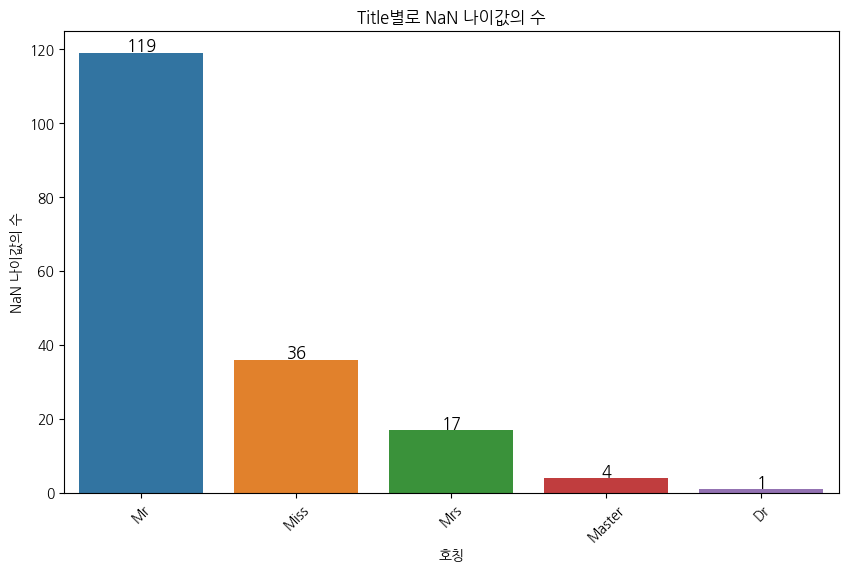

In [ ]:
# Title별로 나이값이 NaN인 데이터 카운트
title_nan_age_counts = df[df['Age'].isnull()]['Title'].value_counts()

# 시각화
plt.figure(figsize=(10,6))
ax = sns.barplot(x=title_nan_age_counts.index, y=title_nan_age_counts.values)
plt.title('Title별로 NaN 나이값의 수')
plt.ylabel('NaN 나이값의 수')
plt.xlabel('호칭')
plt.xticks(rotation=45)

# 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

- 위에서 호칭별 나이의 기초통계량을 다시 살펴보겠습니다.

In [ ]:
# 방금 그래프에 표시된 호칭에 해당하는 데이터만 출력
titles_to_display = title_nan_age_counts.index  # 방금 그래프에 표시된 호칭
filtered_age_analysis = age_analysis[age_analysis['Title'].isin(titles_to_display)]
filtered_age_analysis

,Title,mean,median,min,max,std
3,Dr,42.000000,46.5,23.00,54.0,12.016655
7,Master,4.574167,3.5,0.42,12.0,3.619872
8,Miss,21.773973,21.0,0.75,63.0,12.990292
11,Mr,32.368090,30.0,11.00,80.0,12.708793
12,Mrs,35.898148,35.0,14.00,63.0,11.433628


- 더 상세한 분석을 통해 처리하면 좋겠지만, 위에서 찾아본 특이 호칭에 대한 정보(Master가 어린 남성 아이에게 붙는 호칭이란 점)이나 분포를 볼때 각 호칭별 mean값으로 결측치를 처리해도 될 것 같습니다.
- 이는 임시적 조치이며 차후 모델링을 하며 수정할 수 도 있습니다.

### Age 결측치 채우기

In [ ]:
# 호칭별 평균 나이 계산
title_age_mean = df.groupby('Title')['Age'].mean()

# 결측치를 호칭별 평균 나이로 채우는 함수
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_age_mean[row['Title']]
    else:
        return row['Age']

# Age 컬럼의 결측치 채우기
df['Age'] = df.apply(fill_age, axis=1)

# 처리 결과 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            1
dtype: int64

## Age별 생존율 분석

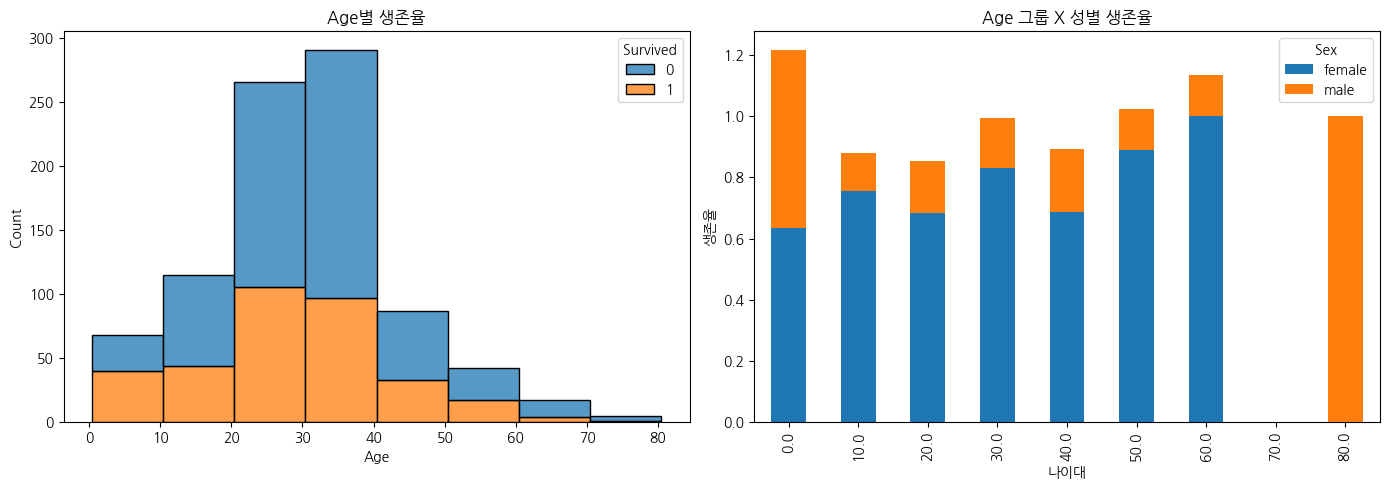

In [ ]:
# Age를 10살 단위로 범주화
df['AgeGroup'] = df['Age'].apply(lambda x: np.floor(x / 10) * 10)

# 하나의 캔버스에 2개의 그래프를 그리기 위한 subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: Age별 생존율
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", ax=axes[0], binwidth=10)
axes[0].set_title('Age별 생존율')

# 두 번째 그래프: 나이대별로 성별 생존율을 stacked bar로 표현
age_sex_survived = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack()
age_sex_survived.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Age 그룹 X 성별 생존율')
axes[1].set_xlabel('나이대')
axes[1].set_ylabel('생존율')

plt.tight_layout()
plt.show()

<Age별 생존율>

- 생각했던것과 다르게 20~40대 사이 인물들의 생존율이 많이 높은 것 같습니다.
- pairplot 으로 봤을때는 어린이들의 생존율이 높을 것으로 예상했는데 생각지 못한 부분입니다.
- 물론 어린아이들의 생존율이 낮은 것은 아니지만 대부분의 어른들이 함께 생존했음을 알 수 있습니다.
- 만약 저 20~40의 생존자가 여성이면서 Ms 등 부인의 호칭을 가진 인물이라면 아이들과 함께 생존한 어머니일 가능성이 높습니다.
- 이에 대한 부분을 체크해볼 필요가 있습니다.
- 그리고 실제로 아래 <Age 그룹 X 성별 생존율> 그래프를 보 면 20~40에서의 생존자들은 대부분 여성임을 알 수 있습니다.
- 해당 연령대의 여성들이 높은 생존율을 보이며 위에서 가정한 사실이 옳은 것으로 보여집니다.
- 위에서 분류해놨던 호칭 데이터를 활용해 해당 연령대의 생존한 여성이 어떤 호칭을 주로 갖고 있는지 살펴보겠습니다.

## 20~40 생존자 여성의 주요 호칭

In [ ]:
# 필터링: 나이대가 20대~50대 이면서 여성이면서 생존한 사람들
filtered_df = df[(df['AgeGroup'] >= 20) & (df['AgeGroup'] <= 50) &
                 (df['Sex'] == 'female') & (df['Survived'] == 1)]

# 호칭 추출을 위한 정규 표현식 패턴
title_pattern = r',\s*([^\.]+)\.'

# 호칭 추출 및 카운트
filtered_df['Title'] = filtered_df['Name'].apply(lambda name: re.search(title_pattern, name).group(1) if re.search(title_pattern, name) else 'Unknown')
title_counts = filtered_df['Title'].value_counts()

title_counts

Mrs             88
Miss            81
Mlle             2
Mme              1
Ms               1
Lady             1
the Countess     1
Dr               1
Name: Title, dtype: int64

- 대부분의 생존자 여성이 Mrs 로 누군가의 부인이거나 어머니일 가능성이 높아 보입니다.
- 물론 이에 못지 않게 Miss의 생존자도 많은데 이는 미혼여성뿐만 아니라 보모인 여성의 호칭도 Miss이기 때문입니다.
- 또한 Mlle 은 프랑스어에서 "Mademoiselle"의 줄임말로, 미혼 여성 또는 젊은 여성에게 붙이는 호칭이었다고 합니다.
- 전반적으로 당시의 시대상을 생각할때 해당 나이대의 여성들을 우선적으로 구출한 것으로 보입니다.

## Pclass & Age별 생존율  | Age & 성별별 생존율

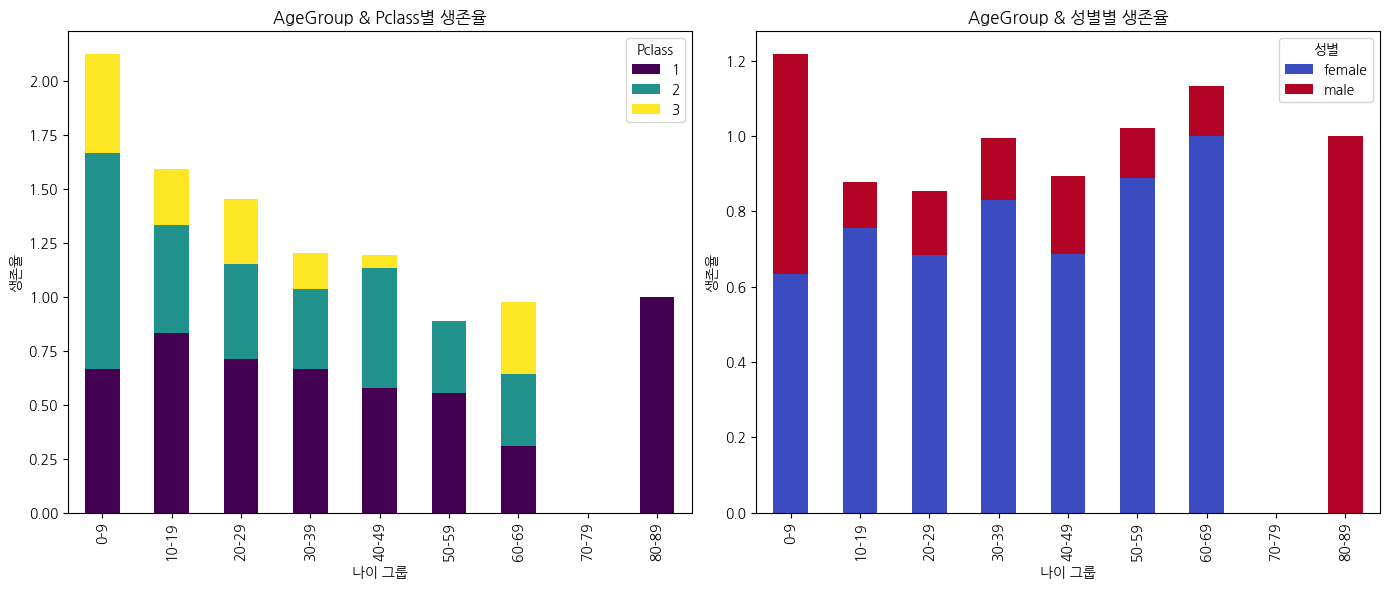

In [ ]:
# Pclass & Age별 생존율 계산
pclass_age_survival = df.pivot_table('Survived', index='AgeGroup', columns='Pclass', aggfunc='mean')

# Age & 성별별 생존율 계산
age_sex_survival = df.pivot_table('Survived', index='AgeGroup', columns='Sex', aggfunc='mean')

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Pclass & Age별 생존율 그래프
pclass_age_survival.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('AgeGroup & Pclass별 생존율')
axes[0].set_xlabel('나이 그룹')
axes[0].set_ylabel('생존율')
axes[0].set_xticklabels([f'{i*10}-{(i+1)*10-1}' for i in range(len(pclass_age_survival))])  # 나이대 라벨 설정
axes[0].legend(title='Pclass')

# Age & 성별별 생존율 그래프
age_sex_survival.plot(kind='bar', stacked=True, ax=axes[1], colormap='coolwarm')
axes[1].set_title('AgeGroup & 성별별 생존율')
axes[1].set_xlabel('나이 그룹')
axes[1].set_ylabel('생존율')
axes[1].set_xticklabels([f'{i*10}-{(i+1)*10-1}' for i in range(len(age_sex_survival))])  # 나이대 라벨 설정
axes[1].legend(title='성별')

# 그래프 보여주기
plt.tight_layout()
plt.show()


[AgeGroup & Pclass별 생존율]
- Pclass별로 보았을때 (0~9세) 그룹을 제외하고는 전부 Pclass 1등급인 승객들의 생존율이 더 높습니다.
- 특히, 10세미만 어린이들의 경우 Pclass에 상관없이 생존율이 높습니다.
    - 위에서 살펴본 나이대별 생존율을 볼때 어린아이들(10세 이하)이 우선적으로 구출되었음을 알 수 있습니다.

[AgeGroup & 성별별 생존율]
- 전반적으로 연령대에 상관없이 여성들이 우선적으로 구출되었음을 다시한번 확인할 수 있습니다.

---

- 어린아이와 여성에 대한 생존율이 전반적으로 높으므로 이를 고려해서 모델링을 해야할 것 같습니다.

## Family Size 추정 : SibSp & Parch 활용

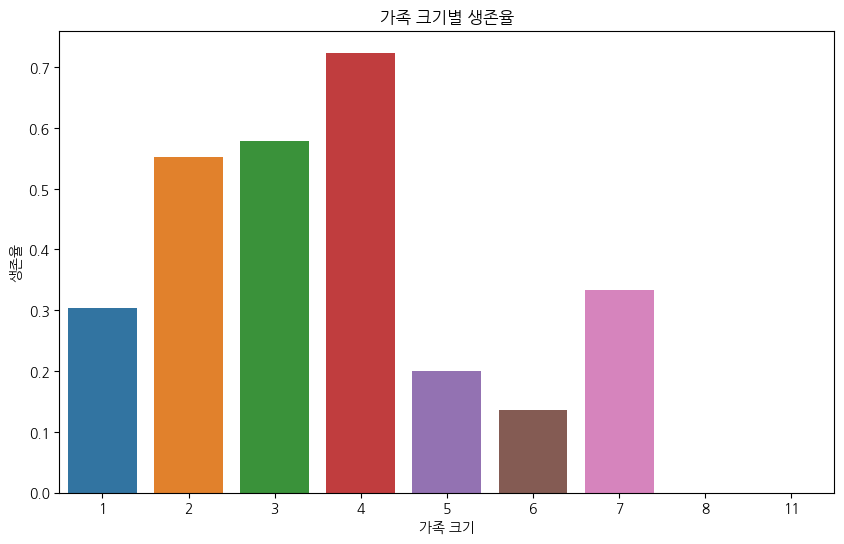

In [ ]:
# 'SibSp'와 'Parch'를 합하여 'FamilySize' 열을 생성. 자기 자신을 포함하기 위해 1을 더합니다.
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# FamilySize에 따른 생존율을 계산
family_survival_rate = df.groupby('FamilySize')['Survived'].mean()

# 시본을 사용하여 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=family_survival_rate.index, y=family_survival_rate.values)
plt.title('가족 크기별 생존율')
plt.xlabel('가족 크기')
plt.ylabel('생존율')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

- 가족수가 많다고 해서 무조건적으로 많이 생존하는 것이 아님을 알 수 있습니다.
- 의외로 2~4명 사이의 구성에 서 살아 남는 경우가 많습니다.
- 2명의 경우 보모와 아이인 경우가 있을 수 있고, 3명은 아이1명인 가정, 4명은 아이2명인 가정정도로 유추해볼 수 있습니다.
- 물론 더 상세한 비교를 통해 검증해 보야 하지만 지금까지의 분포로 본다면 어느정도 유추할 수 있는 사실로 보여집니다.

## 가족수중 어린아이의 비율 시각화

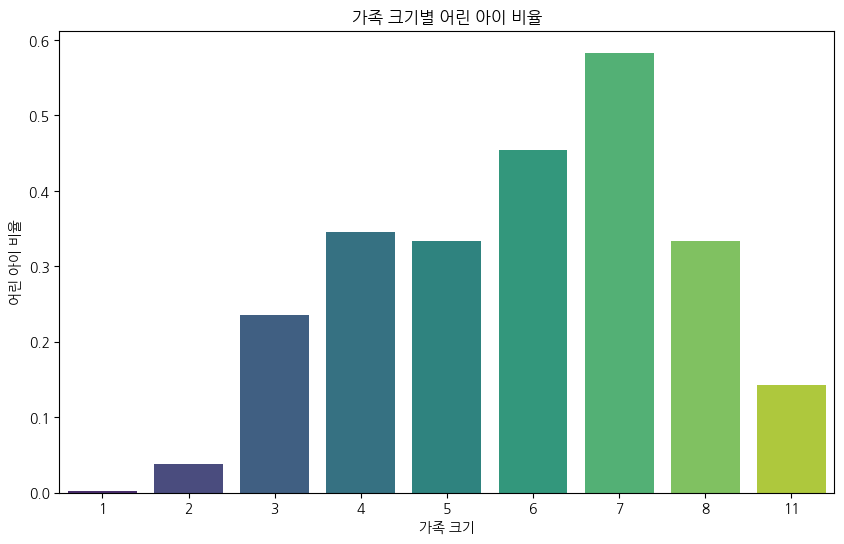

In [ ]:
# 어린 아이로 정의하는 나이 범위 설정 (예: 10세 미만)
child_age_threshold = 10

# 어린 아이의 비율 계산
df['IsChild'] = df['Age'] < child_age_threshold

# 가족 수 중 어린 아이의 비율을 계산
family_child_ratio = df.groupby('FamilySize')['IsChild'].mean()

# 시본을 사용하여 막대 그래프로 표현
plt.figure(figsize=(10, 6))
sns.barplot(x=family_child_ratio.index, y=family_child_ratio.values, palette='viridis')
plt.title('가족 크기별 어린 아이 비율')
plt.xlabel('가족 크기')
plt.ylabel('어린 아이 비율')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

- 가족수가 많을수록 어린아이의 비율이 많은 것으로 추정됩니다.
- 4명가족이 생존율이 높은편인데, 이 경우 아이보다는 20~40대의 어머니가 포함이 되어 생존율이 높은 것 같습니다.
- 특히 대가족인 경우에 어린아이의 비율이 높은 편인 것 같습니다.

## 승선항구별 데이터 분석

- 승선항구별 평균운임
- 승선항구별 평균 생존율
- 승선항구별 생존 및 사망자 수

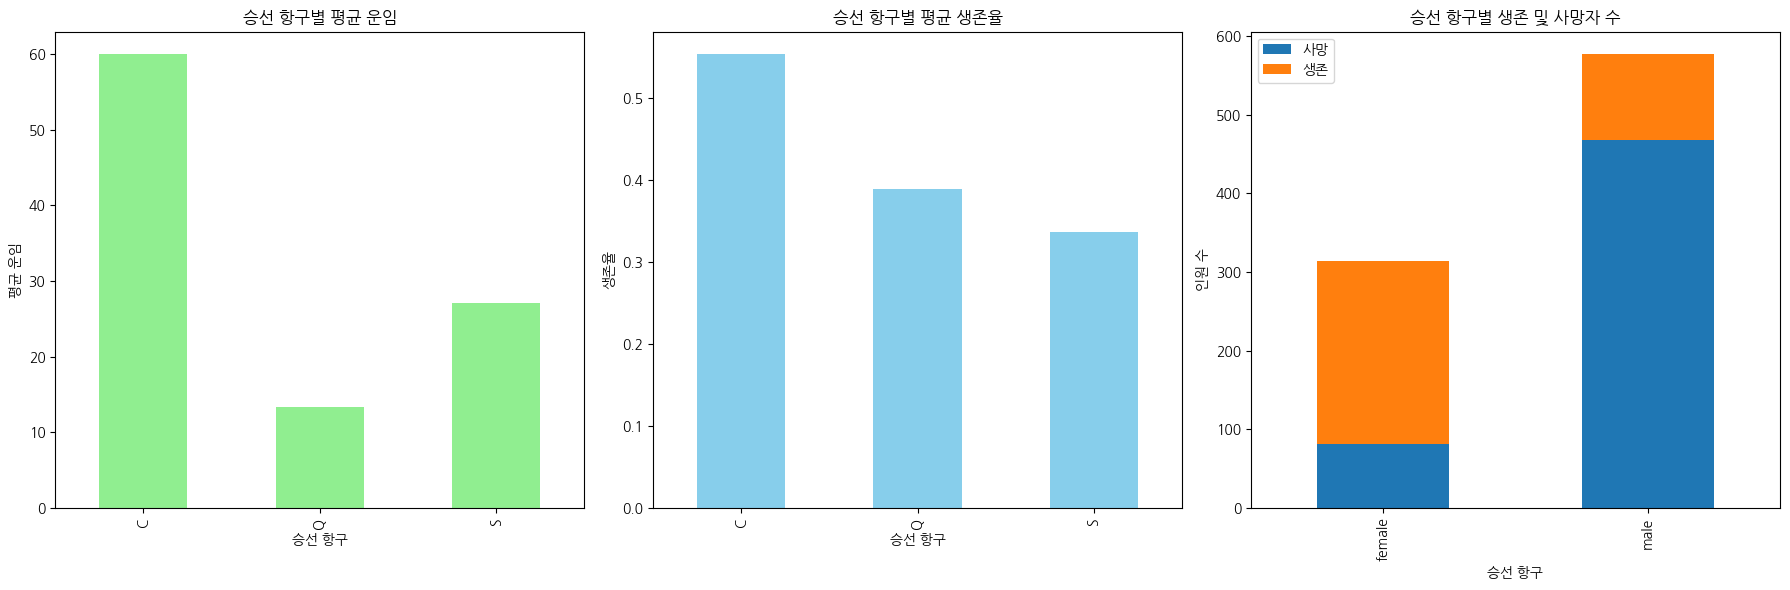

In [ ]:
# Embarked 별 생존율 계산
embarked_survival = df.groupby('Embarked')['Survived'].mean()

# 승선 항구별 평균 운임 계산
embarked_fare = df.groupby('Embarked')['Fare'].mean()

# 새로운 그래프 생성
plt.figure(figsize=(18, 6))

# 첫 번째 서브플롯: Embarked 별 평균 운임 막대 그래프
plt.subplot(1, 3, 1)
embarked_fare.plot(kind='bar', color='lightgreen')
plt.title('승선 항구별 평균 운임')
plt.xlabel('승선 항구')
plt.ylabel('평균 운임')

# 두 번째 서브플롯: Embarked 별 생존율 막대 그래프
plt.subplot(1, 3, 2)
embarked_survival.plot(kind='bar', color='skyblue')
plt.title('승선 항구별 평균 생존율')
plt.xlabel('승선 항구')
plt.ylabel('생존율')

# 세 번째 서브플롯: Embarked 별 생존, 사망자 수 스택드 바 그래프
plt.subplot(1, 3, 3)
survival_count.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('승선 항구별 생존 및 사망자 수')
plt.xlabel('승선 항구')
plt.ylabel('인원 수')
plt.legend(['사망', '생존'])

# 그래프 표시
plt.tight_layout()
plt.show()

- 승선항구별로 데이터를 살펴보았습니다.
- 승선항구별 평균운임이 셰르부르(C)가 가장 높고, 해당 지역의 생존율도 가장 높았습니다.
- Pclass의 승객들이 대부분 높은 생존율을 보인걸 고려할때 C에서 승선한 승객의 대부분이 Pclass가 1등급일 가능성이 있습니다.
- 전체 생존율로 보면 여성이 생존율이 높은 것으로 나타나고 있습니다.

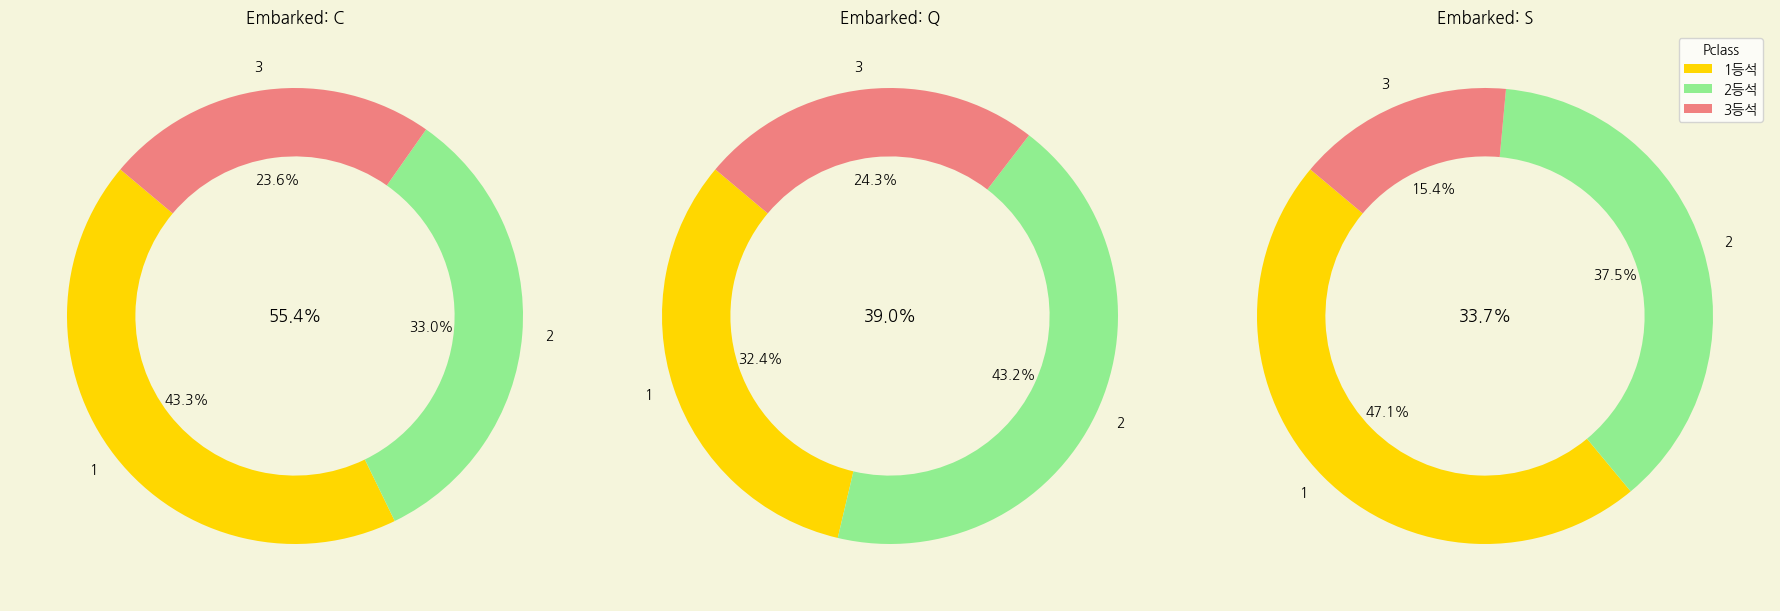

In [ ]:
# 승선 항구별 Pclass별 생존율 계산
embarked_pclass_survival = df.pivot_table('Survived', index='Embarked', columns='Pclass', aggfunc='mean')


# 도넛 차트 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3개의 승선 항구별 차트
colors = ['gold', 'lightgreen', 'lightcoral']  # Pclass별 색상 설정
fig.patch.set_facecolor('beige')  # 캔버스 배경색 설정

for i, (embarked, survival_rates) in enumerate(embarked_pclass_survival.iterrows()):
    axes[i].pie(survival_rates, labels=survival_rates.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
    axes[i].set_title(f'Embarked: {embarked}')

    # 도넛 가운데에 승선항구별 생존율 표시
    survival_rate = embarked_survival.loc[embarked]
    axes[i].text(0, 0, f'{survival_rate:.1%}', ha='center', va='center', fontsize=12)

plt.legend(['1등석', '2등석', '3등석'], title='Pclass', loc='upper right')
plt.tight_layout()
plt.show()

- 위에서의 분석을 기반으로 승선항구별 Pclass를 살펴보니 실제로 C에서 승선한 대부분의 승객들이 1등급 승객이었습니다.
- 하지만 생존율이 높았던 Q항구의 주요승객들이 3등급 승객들인것을 보면 이에 대한 분석을 진행해 보는 것도 유의미할 것 같습니다.
- 또한 지금까지의 분석 결과와 마찬가지로 S 에서 탑승한 대부분의 승객은 3등급 승객이고, 이들의 생존율이 낮은것이 큰 영향을 미쳤을 것으로 보여집니다.

---

# 결론
---


- 전반적으로 생존과 관련된 다양한 데이터들을 살벼보면서 생존율에 유의미한 영향을 끼쳤을 것으로 보이는 데이터들을 분석해보고 그 원인들을 살펴봤습니다.
- 대체로 어린아이 혹은 여성이면서 Pclass가 높은 등급인 사람들이거나, 가족구성원이 2~4명 사이인 인원들의 생존율이 높았다는 것을 알 수 있었습니다.
- 이러한 점들을 고려해서 차후의 분석을 위한 데이터셋을 만들어 낸 뒤에 분석을 모델링을 진행하면 될 것 같습니다.

### 추후 모델링을 진행한다면..?!

#### Feature Engineering
1. 파생변수
- Age와 Pclass를 결합해 새로운 카테고리 변수 생성
    - ex) 젊은(혹은 어린) 승객중 Pclass가 1등석인 사람
- Embarked 와 Pclass를 결합해 새로운 카테고리 변수 생성
- SibSp 와 Parch를 결합한 총 가족구성원 데이터별 생존율 변수 생성
    - 가족 구성원수가 생존율에 미치는 영향을 변수로 사용
- Embarked 와 Fare 결합한 새로운 변수
    - 항구별 요금구간을 표현하는 데이터를 만들고, 이 변수기반 생존율을 구해 활용

2. 범주형 변수 처리
- Sex, Embarked등의 범주형 변수는 원핫인코딩을 통해 수치형으로 변형해 사용합니다.

#### Modeling
- 기본적으로 분류문제이기에 베이스라인 모델로 로지스틱 회귀를 시도하고, 그외에 Random Foret classifier, Gradinet Boosting classifier등을 사용해 비교한 후에 앙상블을 시도할 것 같습니다.
    - 로지스틱 회귀 : 기본적으로 이진 분류에 잘 작동하는 모델이고, 결과 해석이 용이합니다.
    - 랜덤 포레스트 : 각 트리의 예측을 평균내어 도출하는 모델이므로 다양한 변수를 다루고자 하기에 적합한 모델이 될 것 같습니다.
    - 그라디언트 부스팅 : 여러 학습기에 순차적학습으로 결과를 도출하므로 높은 정확도를 기대할 수 있는 모델입니다.

### 회고
---

KEEP
- 간단한 분석이라 생각했는데 생각보다 엄청 손이 많이 가는 시각화 였지만 기존에 수집해둔 코드들이 많아서 빠르게 적용했다.
- 기초통계량과 pairplot을 기반으로 EDA 계획을 세우고 분석을 한 것은 좋은 선택이었다.
- 분석 방향을 명확하게 잡고 집중해서 빠른 시간안에 결과를 도출할 수 있었기 때문


PROBLEM
- 세부 데이터 추출 및 전처리를 하는 과정이 조금 고민이 길었다.
- 늘상 느끼지만 전처리에 대한건 연습을 해도 해도 잘 안느는 것 같다.


TRY
- 차후 모델링을 진행해보면서 더 모델에 핏한 데이터 발굴해보기(feature extraction)
- 전처리 코드에 대한 공부를 더 해야 할거같다. 다양한 예제 케이스를 찾아서 보고 쉐도잉을 해봐야겠다.